In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#Reading the images
rgb_values = np.ndarray(shape=(4,512*512),dtype = np.integer)
for i in range(4):
    image = plt.imread(str(i+1)+".jpg")
    image = np.reshape(image,(512*512,3))
    #print(np.shape(image))
    for j in range(512*512):
        rgb_values[i][j] = image[j][0]
#print(np.shape(rgb_values))

In [11]:
#Calculate and subract mean
T1 = [0,0,0,0]
d1 = np.ndarray(shape=(4,512*512),dtype=np.float64)
for i in range(4):
    T1[i] = np.sum(rgb_values[i])
    T1[i] /= (512*512)
    d1[i] = np.subtract(rgb_values[i],T1[i])
#print(np.shape(d1))

In [12]:
#Calculating covariance matrix
sigma = np.ndarray(shape=(4,4),dtype=np.float64)
for i in range(4):
    for j in range(4):
        sigma[i][j]=np.dot(d1[i,:],d1[j,:])/(512*512)
#print('Covariance Matrix')
#print(sigma)

In [13]:
#Calculating eigen-values and eigen vectors
eigenV = np.linalg.eig(sigma)
#print("eigenValues:")
#print(eigenV[0])
#print("eigenVectors:")
#print(eigenV[1])

In [14]:
#Calculating the sum of Eigen values and sum of variance
sum1 = 0
sum2 = 0
for i in range(4):
    sum1 += sigma[i,i]
sum2 = np.sum(eigenV[0])
#print(round(sum1,4))
#print(round(sum2,4))

In [15]:
#Finding the out_images
Pc = np.dot(eigenV[1].T,d1)
#print(np.shape(out_image))

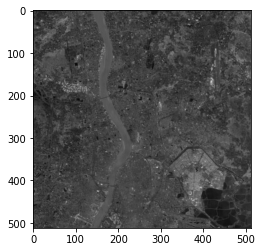

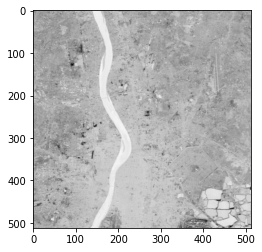

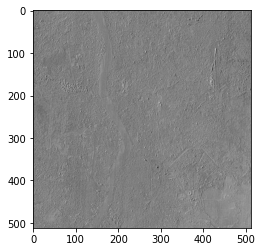

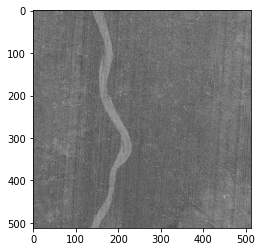

In [16]:
#Printing the out_images
out_images = np.reshape(Pc,(4,512,512))
for i in range(4):
    plt.imshow(out_images[i], cmap='gray')
    plt.show()